# PRS Analysis of BMI 

Make sure to first run `utils/download_data.py`

In [16]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_dir = os.path.join(os.path.dirname(os.getcwd()), 'data') 

In [7]:
df_bmi = pd.read_csv(os.path.join(data_dir, 'bmi/gwas_summary_files/physiological_bmi_bodylength_w_tail.csv'))

In [9]:
df_bmi.head(2)

,chr,rs,ps,n_miss,allele1,allele0,af,beta,se,logl_H1,l_remle,l_mle,p_wald,p_lrt,p_score
0,chr10,chr10:149435,149435,0,T,C,0.876,-0.016290,0.042265,-4326.415,1.332775,1.333718,0.699948,0.699824,0.699854
1,chr10,chr10:767532,767532,0,C,T,0.611,0.006059,0.028462,-4326.467,1.332503,1.333593,0.831419,0.831345,0.831359


In [13]:
df_bmi.describe()

,ps,n_miss,af,beta,se,logl_H1,l_remle,l_mle,p_wald,p_lrt,p_score
count,1.235820e+05,123582.0,123582.000000,123582.000000,123582.000000,123582.000000,123582.000000,123582.000000,1.235820e+05,1.235820e+05,1.235820e+05
mean,8.121280e+07,0.0,0.541574,-0.003044,0.065443,-4328.039254,1.338447,1.339743,4.135834e-01,4.136071e-01,4.138319e-01
std,6.409383e+07,0.0,0.288489,1.514181,3.274857,6.247190,0.046230,0.046306,3.061787e-01,3.061674e-01,3.060956e-01
min,1.432000e+03,0.0,0.010000,-255.705200,0.018835,-4342.682000,1.201243,1.202387,5.844065e-12,5.733366e-12,8.225345e-12
25%,3.128065e+07,0.0,0.303000,-0.035791,0.028525,-4331.022000,1.301057,1.302312,1.278094e-01,1.278889e-01,1.282726e-01
50%,6.810476e+07,0.0,0.546000,-0.003176,0.032328,-4326.166000,1.333023,1.334288,3.743681e-01,3.744201e-01,3.746768e-01
75%,1.109159e+08,0.0,0.803000,0.029550,0.043854,-4323.393000,1.376542,1.377959,6.775552e-01,6.775625e-01,6.777653e-01
max,2.825616e+08,0.0,0.990000,356.844300,921.390500,-4310.291000,1.454985,1.456639,1.000000e+00,9.999881e-01,9.999883e-01


<Axes: >

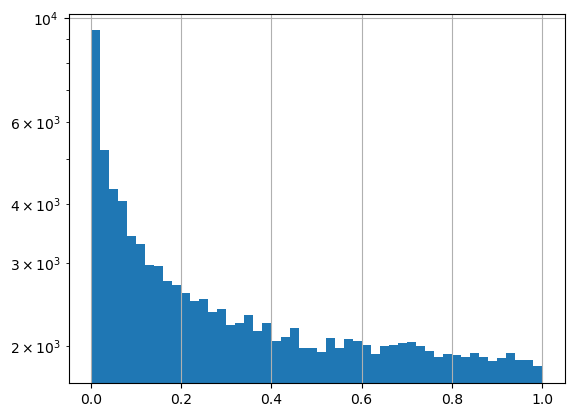

In [14]:
df_bmi['p_wald'].hist(bins=50, log=True)

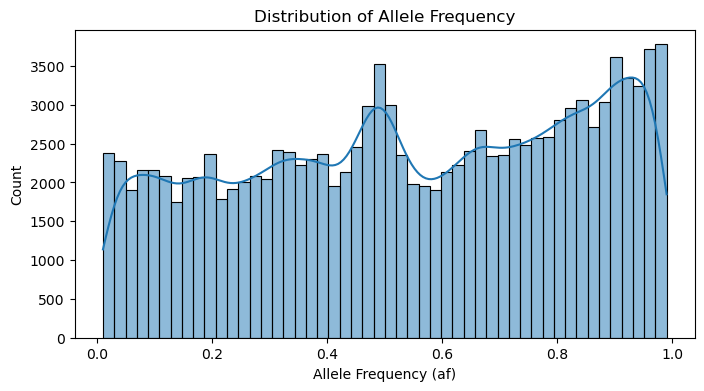

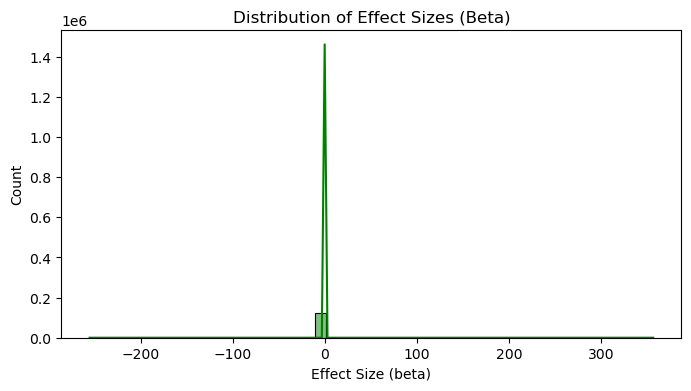

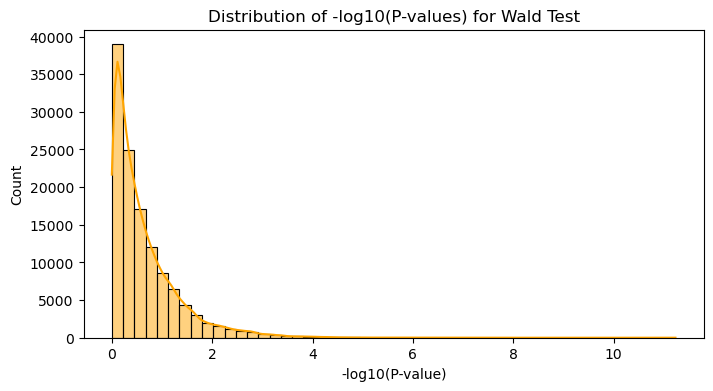

In [18]:

# Distribution of allele frequency
plt.figure(figsize=(8, 4))
sns.histplot(df_bmi['af'], bins=50, kde=True)
plt.title('Distribution of Allele Frequency')
plt.xlabel('Allele Frequency (af)')
plt.ylabel('Count')
plt.show()

# Distribution of effect sizes
plt.figure(figsize=(8, 4))
sns.histplot(df_bmi['beta'], bins=50, color='green', kde=True)
plt.title('Distribution of Effect Sizes (Beta)')
plt.xlabel('Effect Size (beta)')
plt.ylabel('Count')
plt.show()

# Distribution of p-values
plt.figure(figsize=(8, 4))
sns.histplot(-np.log10(df_bmi['p_wald']), bins=50, color='orange', kde=True)
plt.title('Distribution of -log10(P-values) for Wald Test')
plt.xlabel('-log10(P-value)')
plt.ylabel('Count')
plt.show()

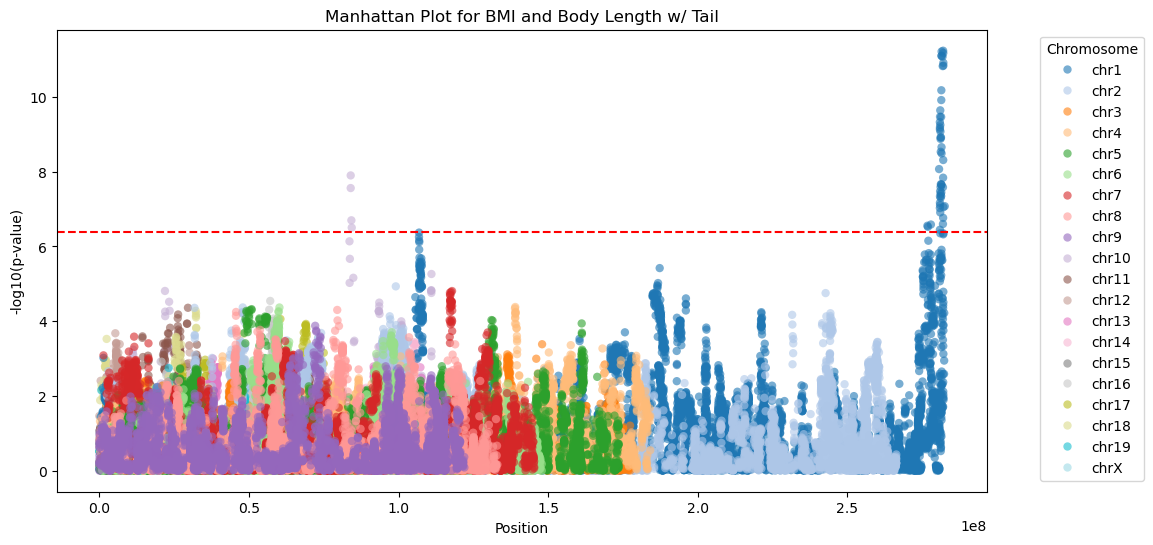

In [19]:
# Create a Manhattan plot
df_bmi['-log10(p_wald)'] = -np.log10(df_bmi['p_wald'])

plt.figure(figsize=(12, 6))

# Convert chromosome labels to categorical types to maintain order in plot
df_bmi['chr'] = pd.Categorical(df_bmi['chr'], categories=[f'chr{i}' for i in range(1, 20)] + ['chrX'], ordered=True)

sns.scatterplot(x='ps', y='-log10(p_wald)', hue='chr', data=df_bmi, palette='tab20', linewidth=0, alpha=0.6)
plt.axhline(y=-np.log10(0.05/df_bmi.shape[0]), color='r', linestyle='--')  # Bonferroni correction line
plt.xlabel('Position')
plt.ylabel('-log10(p-value)')
plt.title('Manhattan Plot for BMI and Body Length w/ Tail')
plt.legend(title='Chromosome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


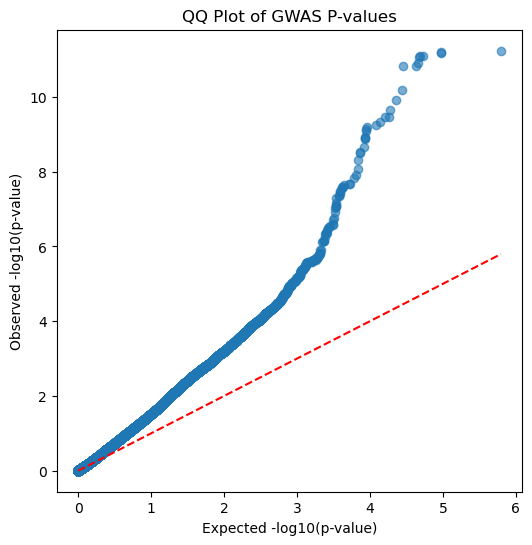

In [21]:
import scipy.stats as stats

# QQ plot of p-values
expected = -np.log10(np.sort(stats.uniform.rvs(size=df_bmi.shape[0])))
observed = -np.log10(np.sort(df_bmi['p_wald']))

plt.figure(figsize=(6, 6))
plt.scatter(expected, observed, alpha=0.6)
plt.plot([min(expected), max(expected)], [min(expected), max(expected)], 'r--')  # Line X=Y for reference
plt.xlabel('Expected -log10(p-value)')
plt.ylabel('Observed -log10(p-value)')
plt.title('QQ Plot of GWAS P-values')
plt.show()
